In [45]:
# Basic packages
import numpy as np
import matplotlib.pyplot as plt

# font setting
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "Times New Roman"

# save path setting
import os
if not os.path.exists('Illustration'):
    os.makedirs('Illustration')
if not os.path.exists('Animation'):
    os.makedirs('Animation')

### 1. 데이터 생성하기

In [70]:
def f(x):
    return x**2

def zoom(x_range=10):
    assert 0 <= x_range <= 10, "Input x_range should be in [0, 10]"

    x = np.linspace(-10, 10, 400)
    plt.figure(figsize=(6, 6))
    plt.plot(x, f(x), label='$y = x^2$', color='blue')
    plt.xlabel('$x$', fontsize=11)
    plt.ylabel('$y$', fontsize=11)
    plt.xlim(-x_range, x_range)
    plt.ylim(0, 100)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid()
    plt.legend(loc='upper right')
    plt.title('Plot of $y = x^2$', fontsize=11)
    plt.savefig('Illustration/{}.png'.format(x_range), dpi=600)
    plt.show()

C:\Users\KIYUOB\AppData\Local\Temp\ipykernel_27616\1582225856.py:12: UserWarning: Attempting to set identical left == right == -0.0 results in singular transformations; automatically expanding.
  plt.xlim(-x_range, x_range)


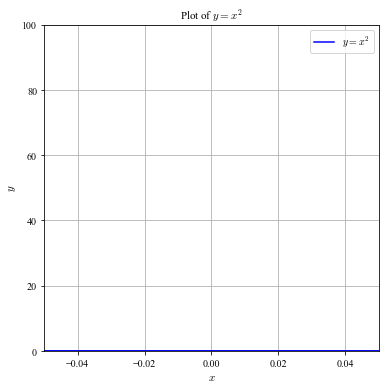

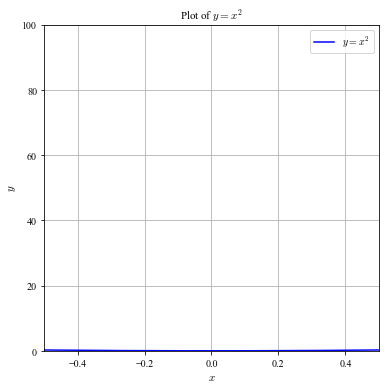

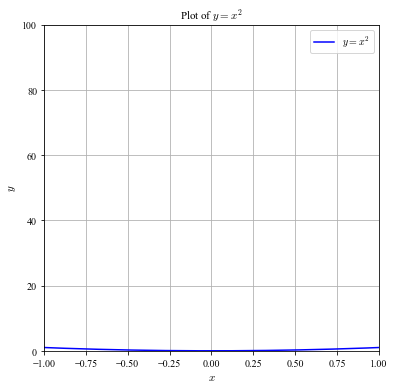

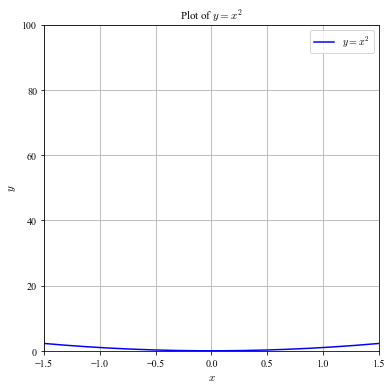

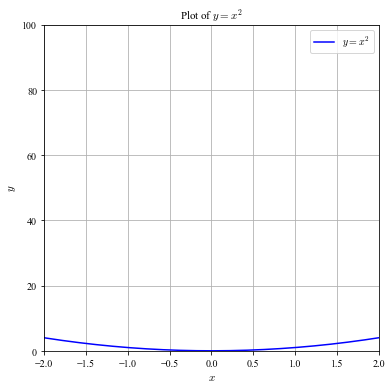

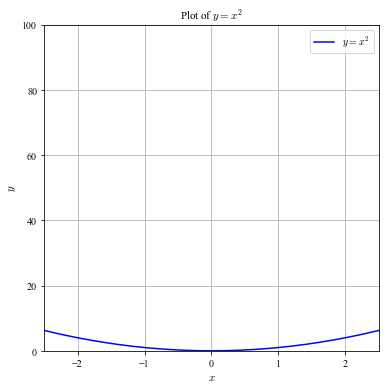

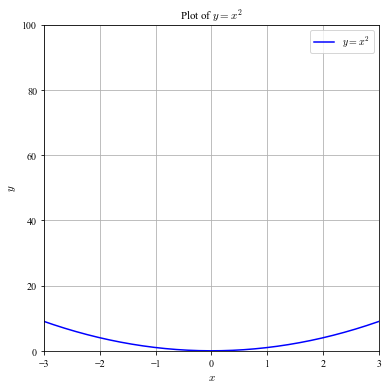

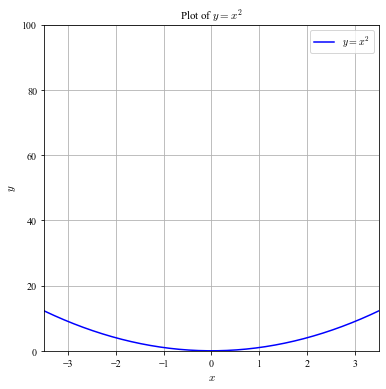

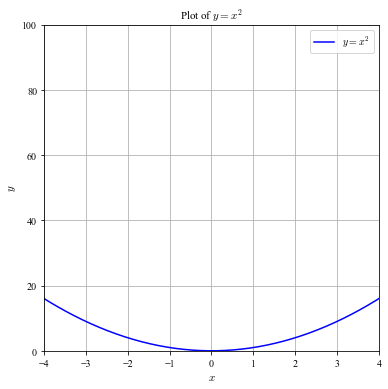

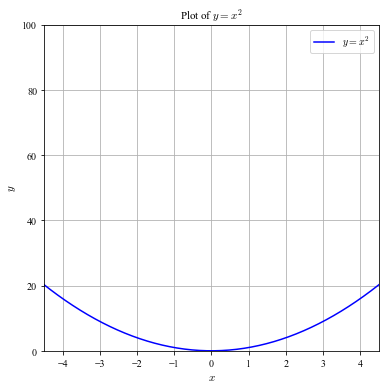

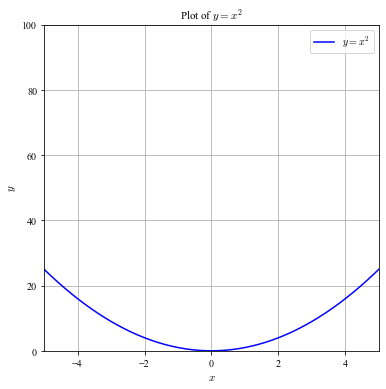

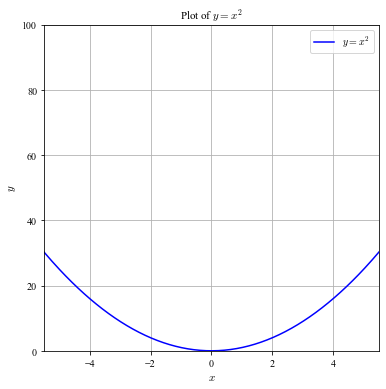

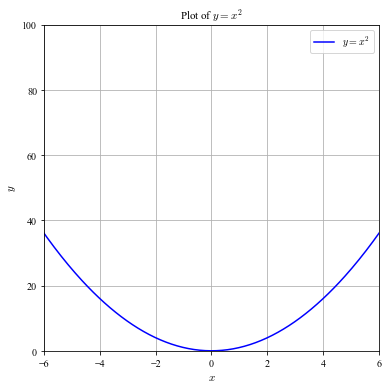

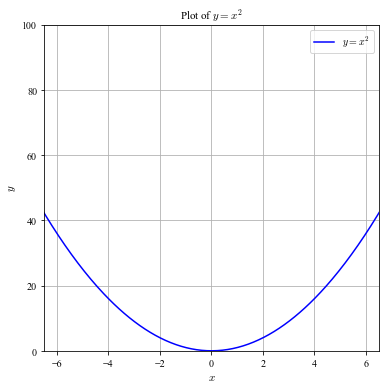

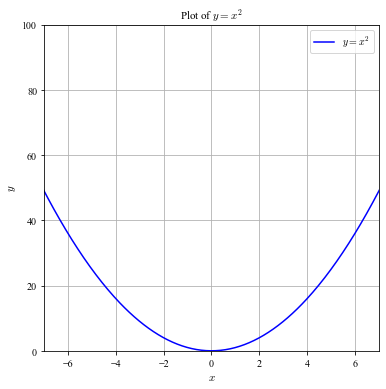

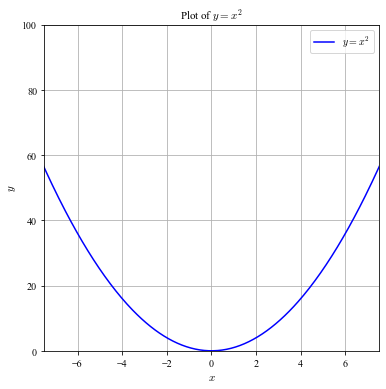

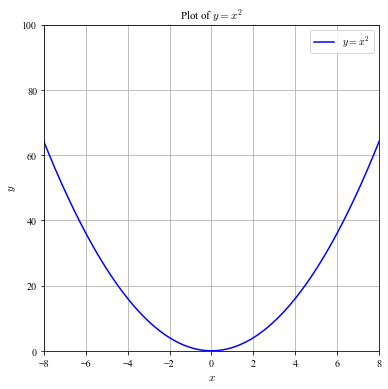

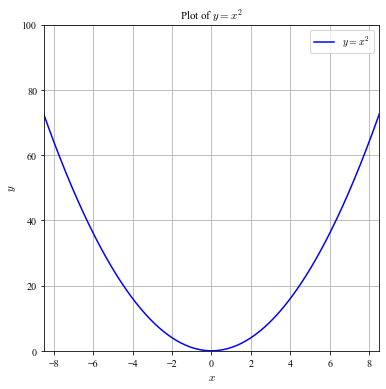

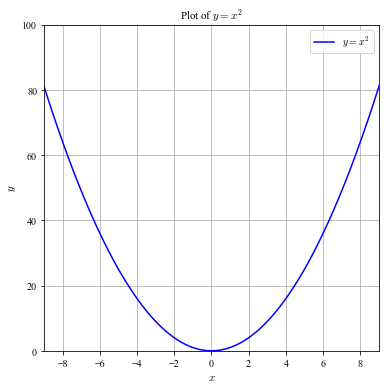

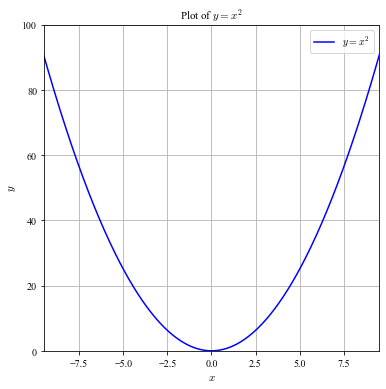

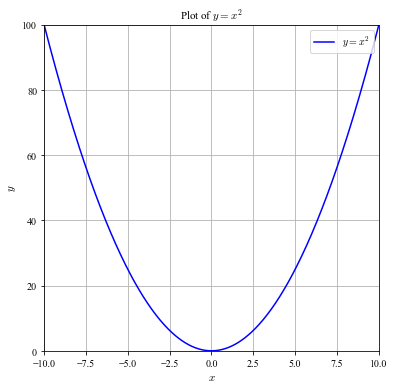

In [71]:
for x_range in np.arange(0, 10.5, 0.5):
    zoom(x_range)

### 2. GIF 애니메이션 만들기

In [36]:
# If imageio or Pillow cannot be imported, use the following command to install it
# >>> pip install Pillow imageio

from PIL import Image
from PIL import ImageOps
import imageio
import os


In [69]:
# input path where the images are located
input_path = "Illustration"

# List of names of image files
image_names = [name for name in os.listdir(input_path) if os.path.isfile(os.path.join(input_path, name))]

# Sort the list of image file names based on the numerical value
image_names = sorted(image_names, key=lambda name: float(name.split('.png')[0]))  # Assumes the format 'NUMBER.png'

# List to store the image files
images = []

# Loop through the image files and add them to the list
for name in image_names:
    image_path = os.path.join(input_path, name)
    image = Image.open(image_path).convert("RGBA")  # Ensure image supports transparency
    image_with_border = ImageOps.expand(image, border=20, fill=(0, 0, 0, 0))  # Add a 20-pixel transparent border
    images.append(image_with_border)

# Create the GIF file
output_path = "Animation/Figure 1 - Animation.gif"
imageio.mimsave(output_path, images, duration=0.4)  # The duration parameter represents the time interval between frames (in seconds)

print("GIF animation creation completed.")

GIF animation creation completed.
